In [102]:
#### load packages, *.h5 folder and exp.h5 file location
%matplotlib widget

from essential_func import *
from analysis_data import *

qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

default_sample_dir = '20-Dec'  #'July-sorted'  # '20-Dec' # 'July-2021-Sample#6'
csv_and_code_abs_directory = '/Users/bashit.a/Documents/Alzheimer/Codes/'
samples_csv = 'data_directory.csv'

dropdown_name_list, cwd, exp_folder = change_python_path(dropdown_name = default_sample_dir, csv_file_location = csv_and_code_abs_directory, samples_csv = samples_csv)

Python directory is set to load samples from : 20-Dec


In [2]:
#### GMM and t-SNE plot
import functools

### figures output widgets
out1 = ipywidgets.Output()
out2 = ipywidgets.Output()

### GMM model
def train_GMM(X, n_components):
    from sklearn.mixture import GaussianMixture               # import package
    gaussian_model = GaussianMixture(n_components=n_components)          # define the model
    
    from sklearn import cluster
    #birch = cluster.Birch(n_clusters=n_components)
    
    gaussian_model.fit(X)                                     # train the model
    labels = gaussian_model.predict(X)                        # assign each data point to a cluster
    return labels

@out1.capture(clear_output=True)
def unsupervised_map(file, labels, clusters):
    f1, ax1 = plt.subplots(num=1)
    plot_labels(file, labels, title='GMM', args = (f1, ax1), cmap = discrete_cmap( N= len(np.unique(labels)), base_cmap = 'brg') )   # discrete_cmap( N= len(np.unique(labels)), base_cmap = 'brg') 'Pastel1'

@out2.capture(clear_output=True)
def manifold_plot(X, labels, perplexity, n_iter, animation):
    tsne_data = manifold_tsne(X, perplexity, n_iter, dim=3)
    print(animation)
    f2, ax2 = plt.subplots(num=2)
    plot_3d(tsne_data, labels, args = (f2,ax2), cmap = discrete_cmap( N= len(np.unique(labels)), base_cmap = 'brg'))  # discrete_cmap( N= len(np.unique(labels)), base_cmap = 'bwr')   'Pastel1'
    if animation: plot_3d_animation(tsne_data, labels, elev=35, azim=60, anim_frames=100, anim_interval=10)

def on_button_clicked_params():
    return dropdown.value, search_q.value, n_point.value, normalize.value, clusters.value, perplexity.value, n_iter.value, animation.value

def on_button_clicked(_):   # 
    %matplotlib widget
    
    ### get function arguments
    dropdown, search_q, n_point, normalize, clusters, perplexity, n_iter, animation = on_button_clicked_params()
    
    ### Data preprocessing
    q_min, q_max = search_q
    X = file_preprocess(file = dropdown, window_size=n_point, qgrid=qgrid2, q_min=q_min, q_max=q_max, normalize=normalize)
    
    ### Unsupervised model training and visualizing
    labels = train_GMM(X, n_components=clusters)
    labels = sort_labels(labels)
    unsupervised_map(dropdown, labels, clusters)
    manifold_plot(X, labels, perplexity, n_iter, animation)
    
### file selection and operation widgets  
files      = cwd_files_search_with('.h5')
dropdown   = ipywidgets.Dropdown(options= files, value = files[0], description='File : ', disabled=False)
search_q   = ipywidgets.FloatRangeSlider( value=(1.0, 2.0), min=qgrid2[0],   max=qgrid2[-1], step=0.0001,   description='q Range:',  disabled=False,  continuous_update=False,  layout=ipywidgets.Layout(width='40%'), orientation='horizontal',  readout=True, readout_format='.3f',)
n_point    = ipywidgets.IntSlider(value=4,                   min=1,         max=10, step=1, description='N-point : ', continuous_update=False, )
normalize  = ipywidgets.Checkbox(value=False, description='Normalize', disabled=False, indent=False )

### clustering and manifold widgets
clusters   = ipywidgets.IntSlider(value=4, min=1, max=20, step=1, description='clusters', continuous_update=False          )
perplexity = ipywidgets.IntSlider(value=30, min=10, max=1000, step=10, description='perplexity', continuous_update=False   )
n_iter     = ipywidgets.IntSlider(value=1000, min=500, max=10000, step=500, description='n_iter', continuous_update=False  )
button     = ipywidgets.Button(description='Go!');                                      button.style.button_color = "green";

button.on_click(on_button_clicked)

### animation object
animation  = ipywidgets.Checkbox(value=False, description='Animation', disabled=False, indent=False )


display(ipywidgets.HBox([dropdown, search_q  ]))
display(ipywidgets.HBox([n_point, normalize, animation ]))
display(ipywidgets.HBox([ipywidgets.VBox([clusters, perplexity, n_iter, button]), out1, out2]))

In [6]:
### Data preprocessing
# file = "2048 B8 masked.h5"
# q_min, q_max = qgrid2[0], qgrid2[-1]
# X = file_preprocess(file = dropdown.value, window_size=n_point.value, qgrid=qgrid2, q_min=q_min, q_max=q_max, normalize=normalize.value)

### file selection and operation widgets  
files      = cwd_files_search_with('.h5')
dropdown   = ipywidgets.Dropdown(options= files, value = files[0], description='File : ', disabled=False)
n_point    = ipywidgets.IntSlider(value=4,                   min=1,         max=10, step=1, description='N-point : ', continuous_update=False, )
normalize  = ipywidgets.Checkbox(value=False, description='Normalize', disabled=False, indent=False )

### clustering and manifold widgets
clusters   = ipywidgets.IntSlider(value=4, min=1, max=20, step=1, description='clusters', continuous_update=False          )
button     = ipywidgets.Button(description='Go!');                                      button.style.button_color = "green";

def on_button_clicked_params():
    return dropdown.value, n_point.value, normalize.value, clusters.value, animation.value

def on_button_clicked(_):   # 
    %matplotlib widget
    
    ### get function arguments
    dropdown, n_point, normalize, clusters, perplexity, n_iter, animation = on_button_clicked_params()
    
    ### Data preprocessing
    q_min, q_max = qgrid2[0], qgrid2[-1]
    X = file_preprocess(file = dropdown, window_size=n_point, qgrid=qgrid2, q_min=q_min, q_max=q_max, normalize=normalize)
    
    ### Unsupervised model training and visualizing
    labels = train_GMM(X, n_components=clusters)
    labels = sort_labels(labels)
    unsupervised_map(dropdown, labels, clusters)
    manifold_plot(X, labels, perplexity, n_iter, animation)

button.on_click(on_button_clicked)

### animation object
animation  = ipywidgets.Checkbox(value=False, description='Animation', disabled=False, indent=False )


display(ipywidgets.HBox([dropdown,  ]))
display(ipywidgets.HBox([n_point, normalize, animation ]))
display(ipywidgets.HBox([ipywidgets.VBox([clusters, button]), out1, out2]))

In [72]:
q_min, q_max = qgrid2[indices]
X = file_preprocess(file = dropdown.value, window_size=n_point.value, qgrid=qgrid2, q_min=q_min, q_max=q_max, normalize=normalize.value)

(4941, 576)

array([0.02094909, 0.0213352 , 0.02015027, ..., 0.02158781, 0.02102682,
       0.0207962 ])

In [75]:
### looking for zeros in the merged dataset
def search_indices_for_non_zero(Iq):
    indices = []

    for i in range(0,Iq.shape[1],1):
        if np.sum(Iq[:,i])!=0:
            indices.append(i)
            break

    for i in range(Iq.shape[1]-1,0,-1):
        if np.sum(Iq[:,i])!=0:
            indices.append(i)
            break
    return indices
indices = search_indices_for_non_zero(Iq)

indices

[2, 578]

In [86]:
### visualization
qgrid           = np.round(qgrid2[indices[0]:indices[1]],3)
from sklearn import preprocessing
import plotly.express as px


data_input_w    = ipywidgets.RadioButtons(options=['all', 'trained', 'testing'],value='all')
preprocessing_w = ipywidgets.RadioButtons(options=['no_scaling', 'min_max', 'standard_scalar'],value='no_scaling')
plot_type_w     = ipywidgets.RadioButtons(options=['RAW-DATA', 'PCA'],value='RAW-DATA')
dimension_w     = ipywidgets.RadioButtons(options=['2D', '3D'],value='3D')
dim_1_w         = ipywidgets.SelectionSlider(options = qgrid, value = qgrid[50], orientation='vertical' , description='x-qgrid', continuous_update=False, style = {'description_width': 'initial'}, readout=True, readout_format='.2f',)
dim_2_w         = ipywidgets.SelectionSlider(options = qgrid, value = qgrid[100], orientation='vertical' , description='y-qgrid', continuous_update=False, style = {'description_width': 'initial'},readout=True, readout_format='.2f',)
dim_3_w         = ipywidgets.SelectionSlider(options = qgrid, value = qgrid[150], orientation='vertical' , description='z-qgrid', continuous_update=False, style = {'description_width': 'initial'},readout=True, readout_format='.2f',)
classifier_w    = ipywidgets.RadioButtons(options=['SVM', 'KMeans', 'Meanshift'],value='SVM')


min_max_scaler = preprocessing.MinMaxScaler()
scaler         = preprocessing.StandardScaler()

def plot_data_func(data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w ,dim_2_w ,dim_3_w ):

    q_indices =  np.array([qgrid_to_indices(qgrid, qvalue=qvalue) for qvalue in [dim_1_w ,dim_2_w ,dim_3_w]])
    print('{}'.format(qgrid[q_indices]))
    
    if data_input_w == 'all':
        
        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X[:,q_indices]))  
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X[:,q_indices]))  
        else:
            x1,y1,z1 = zip(*X[:,q_indices])

        if plot_type_w =='PCA': 
            x1,y1,z1 = zip(*pca.fit(X).transform(X))
    
    fig = px.scatter_3d(x=x1, y=y1, z=z1, template="plotly_white")  #  color=label1, symbol=pdb1, hover_name=twist1,
    fig.update_layout(
        autosize=True,
        width=1400,
        height=800,)
    fig.show()
    
    
plot_data = ipywidgets.interactive_output(plot_data_func, { 'data_input_w' : data_input_w    ,\
                                                            'preprocessing_w' : preprocessing_w ,\
                                                            'plot_type_w': plot_type_w,\
                                                            'dimension_w' : dimension_w     ,\
                                                            'dim_1_w' : dim_1_w         ,\
                                                            'dim_2_w' : dim_2_w         ,\
                                                            'dim_3_w' : dim_3_w     })

accordion_data            = ipywidgets.Accordion(children = [ipywidgets.VBox([ipywidgets.HBox([data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w, dim_2_w, dim_3_w, ]), plot_data])], titles   = ['Data'] )
accordion_classifier      = ipywidgets.Accordion(children = [classifier_w], titles   = ['Classifier'] )

tab = ipywidgets.Tab()
tab.children = [accordion_data, accordion_classifier]
tab.titles = ['1','4','3']

display(tab)

In [87]:
img_gray = np.asarray(X, dtype=np.uint8)

<AxesSubplot: >

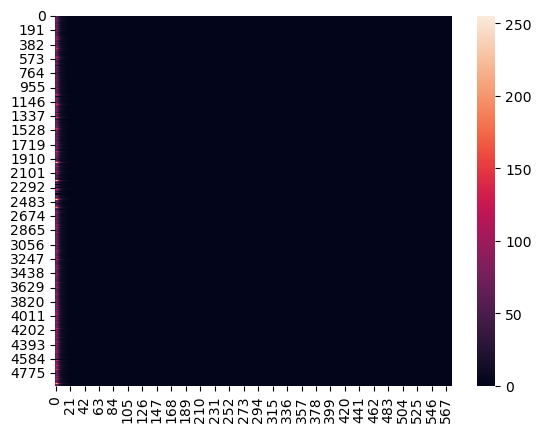

In [92]:
%matplotlib inline
import seaborn as sns
sns.heatmap(img_gray)

Button(description='Disconnect mpl', style=ButtonStyle())

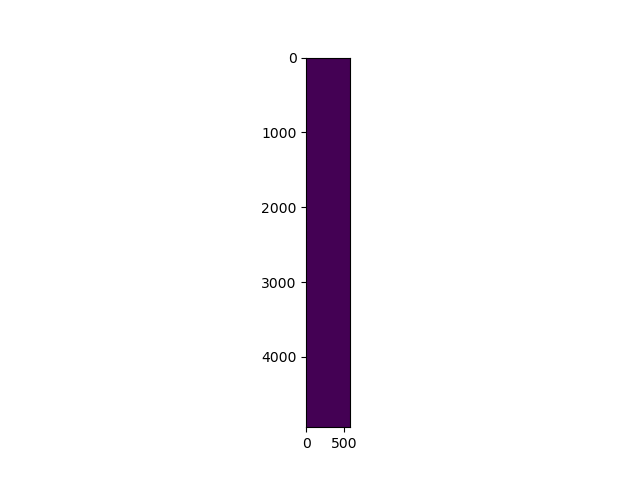

In [103]:
%matplotlib widget

import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
import cv2

class bbox_select():
    %matplotlib notebook 


    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)


        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)

        

bs = bbox_select(img_gray)
            